<a href="https://colab.research.google.com/github/xhze2016/Machine-Learning/blob/main/drug_pred200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this case, predicting the outcome of the drugs that might be accurate for the patient was performed. The types of drugs chosen for a patient were determined by the patient’s age, sex, Blood Pressure Levels (BP), Cholesterol Levels, and Na to Potassium Ratio. Three models were evaluated, and Random Forest Model is gave the least value for the mean absolute error, which means predictions made by this model were close to the real values comparing to the other 2 models (Linear Regression and AdaBoost Regression).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [ ]:
data = pd.read_csv('drug200.csv')
data.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [ ]:
data.isnull().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

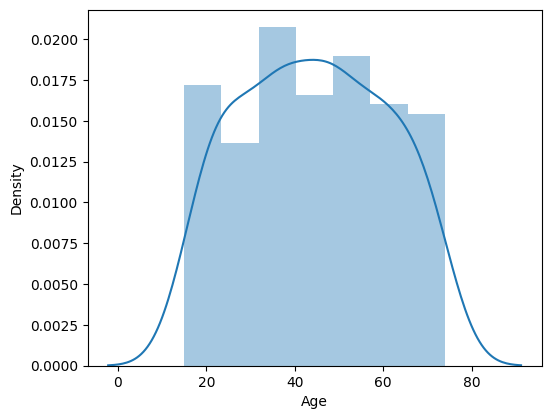

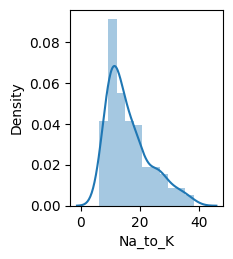

In [ ]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['Age', 'Na_to_K']):
  plt.subplot(2,3, i + 1)
  sns.distplot(data[col])
  plt.tight_layout()
  plt.show()


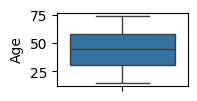

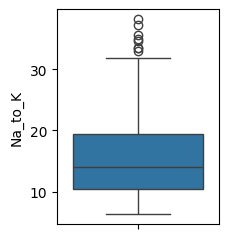

In [ ]:
plt.subplots(figsize=(5,2))

for i, col in enumerate(['Age', 'Na_to_K']):
  plt.subplot(2,3, i + 1)
  sns.boxplot(data[col])
  plt.tight_layout()
  plt.show()


In [ ]:
data.shape, data[(data['Na_to_K']<30)].shape

((200, 6), (188, 6))

In [ ]:
data[(data['Na_to_K']<30)]
data.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
126,66,M,HIGH,HIGH,16.347,DrugY
76,36,F,HIGH,HIGH,11.198,drugA
119,61,F,HIGH,HIGH,25.475,DrugY
30,18,F,NORMAL,NORMAL,8.750,drugX
86,51,F,NORMAL,HIGH,13.597,drugX


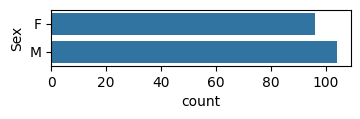

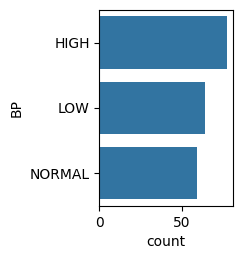

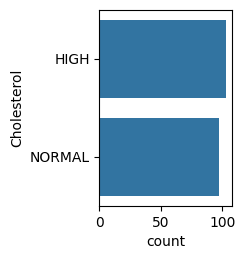

In [ ]:
features = data.loc[:,'Sex':'Cholesterol'].columns

plt.subplots(figsize=(10,2))
for i, col in enumerate(features):
  plt.subplot(2,3, i + 1)
  sns.countplot(data[col])
  plt.tight_layout()
  plt.show()

In [ ]:
le = LabelEncoder()

for col in data.columns:
  if data[col].dtype == object:
	  data[col] = le.fit_transform(data[col])

data.sample(10)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
87,69,1,1,0,15.478,0
92,29,0,0,0,29.450,0
171,45,1,1,1,10.017,4
189,64,1,0,1,20.932,0
80,60,1,0,0,13.934,2
50,58,0,0,0,19.416,0
39,15,1,2,0,9.084,4
146,37,0,1,1,12.006,4
184,18,0,0,0,37.188,0
155,49,1,1,0,10.537,3


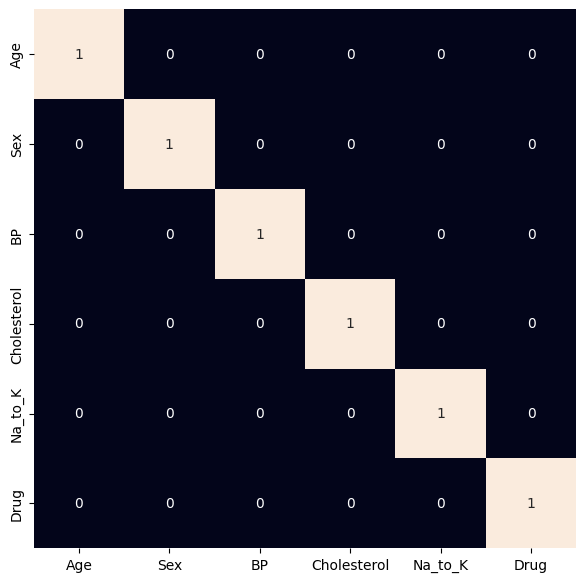

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr() > 0.7, annot = True, cbar = False)
plt.show()


In [ ]:
features = data.drop('Drug', axis=1)
target = data['Drug']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape


((160, 5), (40, 5))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
models = [LinearRegression(), RandomForestRegressor(), AdaBoostRegressor()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  pred_train = models[i].predict(X_train)
  print('Training Error : ', mae(Y_train, pred_train))

  pred_val = models[i].predict(X_val)
  print('Validation Error : ', mae(Y_val, pred_val))
  print()


LinearRegression() : 
Training Error :  0.9257888520204911
Validation Error :  0.9354740460728109

RandomForestRegressor() : 
Training Error :  0.003374999999999996
Validation Error :  0.08875000000000001

AdaBoostRegressor() : 
Training Error :  0.026785714285714274
Validation Error :  0.10714285714285714



Out of the 3 chosen models, RandomForestModel gave the least value for the mean absolute error, which demostrated that predictions made by this model are close to the real values comparing to the other 2 models.